# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [116]:

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split


In [117]:
df_md07t02 = pd.read_csv('dataframe_cat_dummy.csv')

df_md07t02.head(3)

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,False,...,1,0,0,0,0,1,0,0,0,0
1,1,0,52.356164,8.358904,1,0,1,1,1.0,False,...,0,0,1,0,0,1,0,0,0,0
2,2,0,52.356164,8.358904,1,0,1,1,1.0,False,...,0,0,1,0,0,1,0,0,0,0


In [118]:
y = df_md07t02.mau
x = df_md07t02.drop('mau',axis=1)

In [119]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x,y,test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [120]:
#1
clf = DecisionTreeClassifier(random_state=100)


In [121]:
#2
clf = clf.fit(x_treinamento,y_treinamento)
clf

DecisionTreeClassifier(random_state=100)

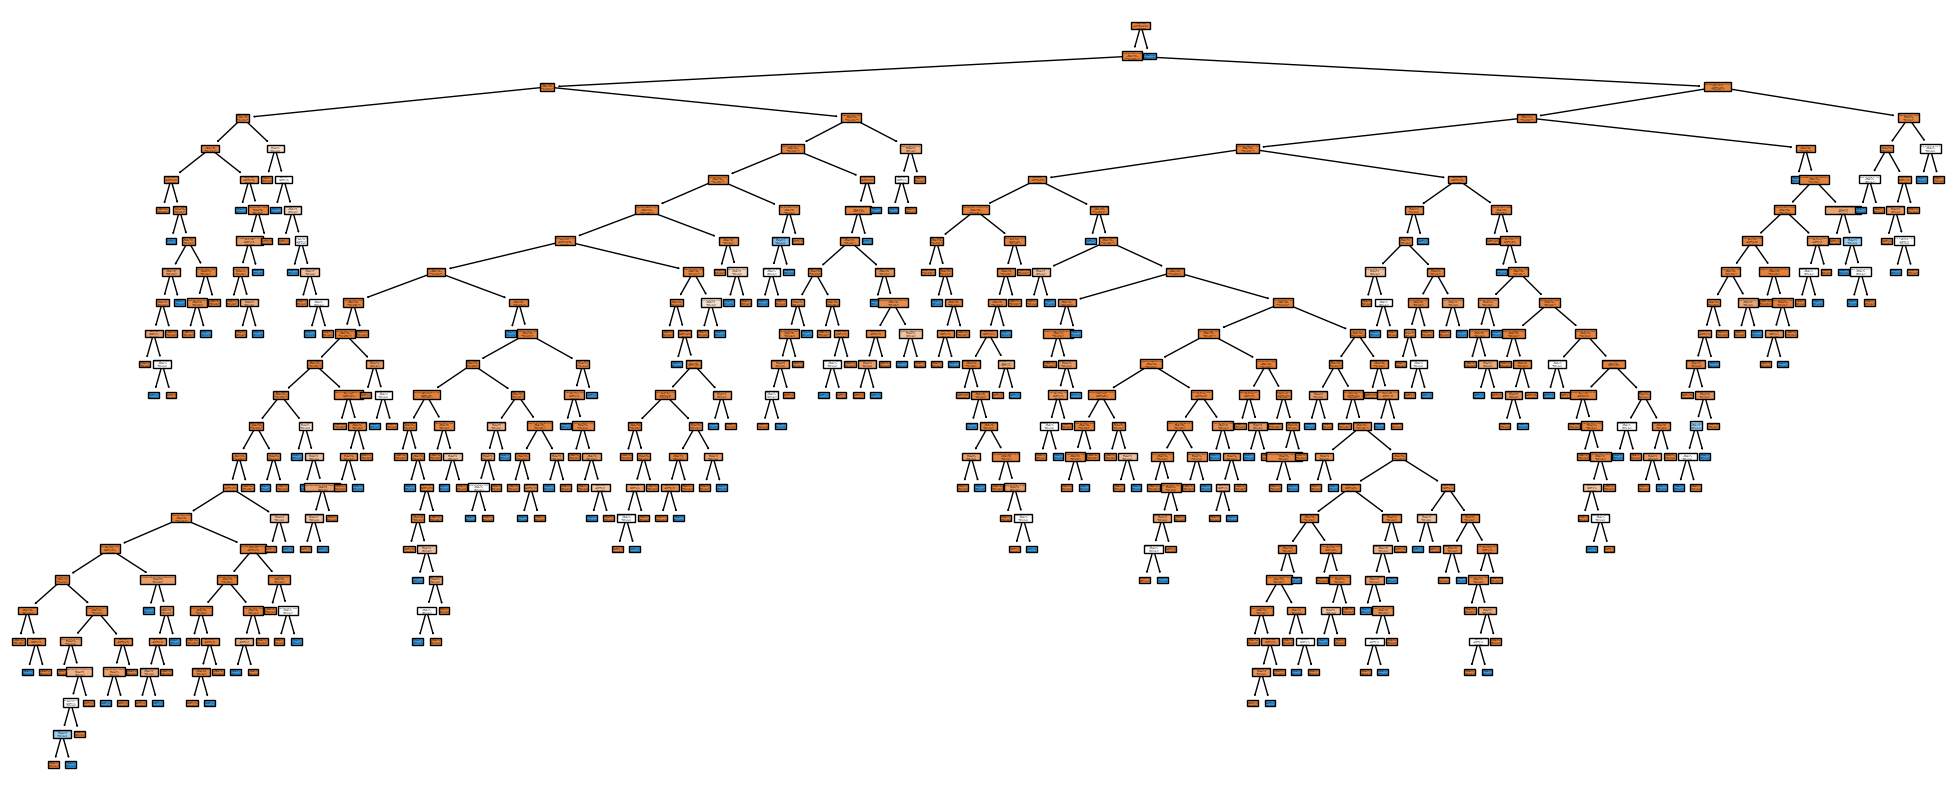

In [122]:
#3
plt.figure(figsize=(25,10))
plot_tree(clf,
          filled=True,
          class_names=['Mau','Bom'],
          feature_names=list(x_treinamento.columns));

False    11392
True       263
Name: mau, dtype: int64


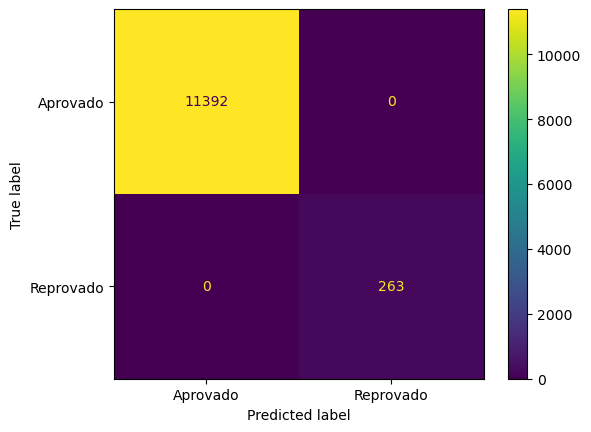

In [123]:
#4
cm = confusion_matrix(y_treinamento, clf.predict(x_treinamento), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovado','Reprovado'])
print(y_treinamento.value_counts())
MatrizDeConfusao.plot();

In [124]:
#5
print('A acurácia é de:')
accuracy_score(y_treinamento,clf.predict(x_treinamento))

A acurácia é de:


1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [125]:
#1
clf.predict(x_teste)


array([False, False, False, ..., False, False, False])

False    4868
True      127
Name: mau, dtype: int64


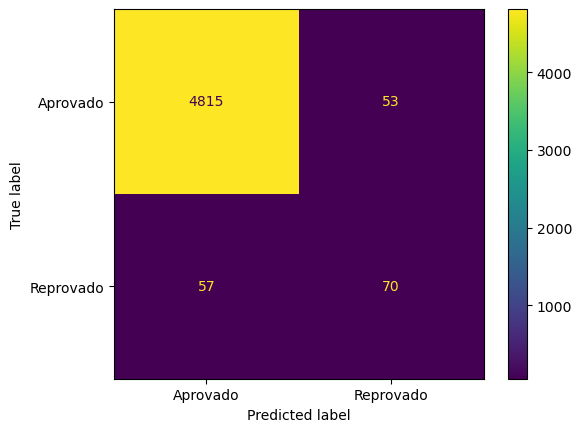

In [126]:
#2
cm = confusion_matrix(y_teste, clf.predict(x_teste), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovado','Reprovado'])
print(y_teste.value_counts())
MatrizDeConfusao.plot();

A acurácia de Treinamento é:
1.0
A acurácia de Teste é:
0.977977977977978


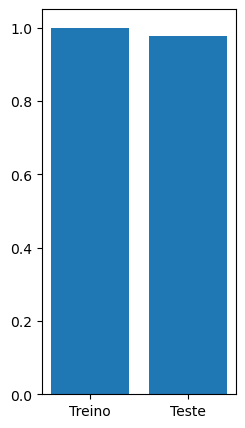

In [127]:
#3
ac_treino = accuracy_score(y_treinamento,clf.predict(x_treinamento))
ac_teste = accuracy_score(y_teste,clf.predict(x_teste))
print(f'A acurácia de Treinamento é:\n{ac_treino}\nA acurácia de Teste é:\n{ac_teste}')
plt.figure(figsize=(2.5,5))
plt.bar(['Treino','Teste'], [ac_treino,ac_teste]);

In [128]:
#4
clf_novo = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf_novo = clf_novo.fit(x_treinamento,y_treinamento)


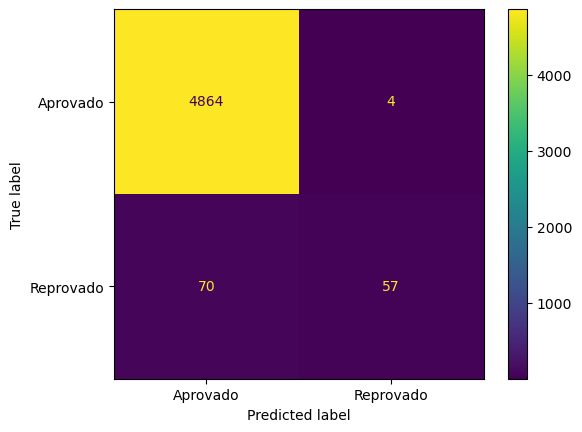

In [129]:
cm_novo = confusion_matrix(y_teste, clf_novo.predict(x_teste), labels=clf_novo.classes_)
MatrizDeConfusao_novo = ConfusionMatrixDisplay(confusion_matrix=cm_novo, display_labels=['Aprovado','Reprovado'])

MatrizDeConfusao_novo.plot();


In [175]:
y_chapeu = pd.DataFrame(clf_novo.predict(x_teste));
y_maus = y_chapeu.value_counts()[1]/y_chapeu.shape[0]*100
print(f'Um total de {y_chapeu.value_counts()[1]} clientes, que corresponde a {y_maus:.2f}% foram classificados como "maus"!!')


Um total de 61 clientes, que corresponde a 1.22% foram classificados como "maus"!!


In [177]:
#5
y_Bom = y_teste.map(lambda x:False)
ac_teste_novo = accuracy_score(y_Bom,clf_novo.predict(x_teste))
##########
print(f'A acurácia de Treinamento é:\n{ac_treino}\nA acurácia de Teste é:\n{ac_teste}')
print(f'A acurácia para todos Bons é de:\n{ac_teste_novo}')


A acurácia de Treinamento é:
1.0
A acurácia de Teste é:
0.977977977977978
A acurácia para todos Bons é de:
0.9877877877877878
